
# Integrais nunha dimensión


In [1]:
import time
print(' Última execución  ', time.asctime() )

 Última execución   Sat Mar 15 23:56:48 2025



### Obxectivos

 - Introducir o concepto de suma de Riemann.

 - Mostrar algúns exemplos

 - Lembrar os métodos de integración


In [2]:
# general imports
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# numpy and matplotlib
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
matplotlib.style.use('ggplot')

figsize = 6, 3.8
cmap    = 'hot'

In [3]:
import sys
from IPython.display import Javascript

## potential fix to display latex in google colab
def fix_mathjax():
    if "google.colab" in sys.modules:
        display(Javascript("""
            MathJax.Hub.Queue(["setRenderer", MathJax.Hub, "CommonHTML"]);
            MathJax.Hub.Queue(["Rerender", MathJax.Hub]);
        """))

fix_mathjax()


## Integrais

 Na seguinte figura, como calcularías a área baixo a gráfica e o eixe x?


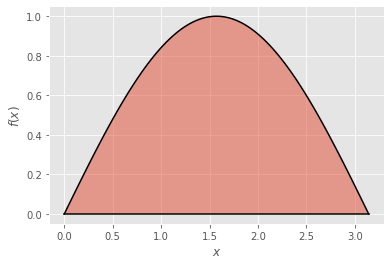

In [4]:
fun = lambda x : np.sin(x) 
a, b, size = 0., np.pi, 100
xs  = np.linspace(a, b, size)
plt.plot(xs, fun(xs), 'black'); plt.plot(xs, np.zeros(100), 'black');
plt.fill_between(xs, fun(xs), alpha = 0.5); plt.xlabel(r'$x$'); plt.ylabel(r'$f(x)$');


Imos primeiro definir o que é unha partición dun intervalo.

####  Partición

 Unha partición, $P$ é un conxunto finito, ${x_i; \; i = 0, \dots, n}$, de puntos consecutivos no intervalo $[a, b]$, tal que $x_0 = a, \; x_n = b$ e $x_i < x_{i +1} \; \forall i$

 O tamaño ou norma, $| P |$, dunha partición será o tamaño do maior dos seus subintervalos, $\mathrm{máx}\{x_{i} - x_{i-1}; \; i = 1, \dots, n \}$

 Unha partición é máis pequena ou máis fina que outra se a súa norma é menor.

 Unha partición é regular se $\Delta x_i = \delta, \; i = 1, \dots, n$.



### Suma de Riemann

 Sexa $P$ unha partición do intervalo $[a, b]$ e $t_i$ sexa un punto do subintervalo $[x_{i-1}, x_i]$ e $[x_{i-1}, x_i]$ y $\Delta x_i = x_{i} - x_{i-1}$ con $i = 1, \dots, n$ e $f(x)$ unha función, $\mathbb{R} \to \mathbb{R}$; Chamamos á suma de Riemann á cantidade:

$$
\mathcal{S}(f, P) = \sum_{i=1}^n f(t_i) \, \Delta x_i
$$


In [5]:
def riemann_sum(fun, a, b, size = 100, draw = False):
    xs   = np.linspace(a, b, size)
    dx   = xs[1] - xs[0]  
    ts   = [xi + dx * np.random.uniform() for xi in xs[:-1]]
    sr   = sum([fun(ti) * dx for ti in ts])
    if (draw): 
        plt.bar(xs[:-1] + 0.5 * dx, fun(ts), dx)
        plt.plot(xs, fun(xs), c= 'black')
    return sr


*Explora:* modifica na seguinte cela a función, o intervalo e, especialmente, o número de subintervalos da partición regular.


Riemann Sum 2.00263


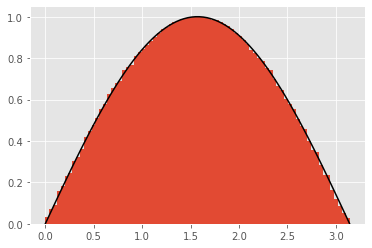

In [6]:
rsum = riemann_sum(np.sin, 0, np.pi, size = 80, draw = True)
print('Riemann Sum {:6.5f}'.format(rsum))


Na seguinte cela estudamos a evolución da suma de Riemann para particións regulares cada vez máis finas.


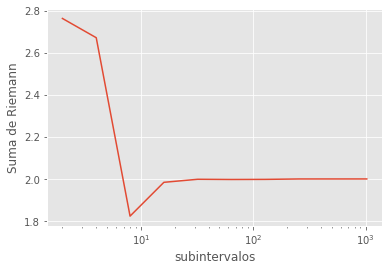

In [7]:
fun   = lambda x : np.sin(x)
a, b  = 0., np.pi
sizes = [int(2**i) for i in range(1, 11)]
srs   = [riemann_sum(fun, a, b, int(size)) for size in sizes]
plt.plot(sizes, srs); plt.xscale('log'); plt.ylabel('Suma de Riemann'); plt.xlabel('subintervalos');


Comprobamos que a suma de Riemann para particións cada vez máis finas converxe a un determinado valor $S$.



### Integral de Riemman

 Dicimos que a función $f(x)$ é integrable de Rienmann se existe un número $S$, ou integral de Riemman, tal que $\forall \epsilon >0$, existe unha partición $P_\epsilon$ do intervalo $[a , b]$, tal que para unha partición máis fina que $P_\epsilon$, e para cada elección de puntos $t_i$ do subintervalo $[x_{i-1}, \, x_i]$, temos:

$$
| \mathcal{S}(f, P) - S | < \epsilon
$$

 O número $S$ está representado por:

$$
S = \int_a^b f(x) \; \mathrm{d}x
$$



A suma de Riemann superior defínese:

$$
\mathcal{U}(f, \mathcal{P}) = \sum_{i=1}^n f(x'_i) \; \Delta x_i 
$$

onde agora $x'_i$  o valor do subintervalo $[x_{i-1}, \,x_{i}]$ onde a función $f(x)$ é *máxima* .

 E a suma inferior de Riemann:

$$
\mathcal{L}(f, \mathcal{P}) = \sum_{i=1}^n f(x'_i) \, \Delta x_i  
$$

onde agora $x'_i$ é o valor do intervalo $[x_{i-1}, x_{i}]$ onde a función $f(x)$ é *mínima*.

Sempre é certo:

$$
\mathcal{L}(f, \mathcal{P}) \le \mathcal{S}(f, \mathcal{P}) \le \mathcal{U}(f, \mathcal{P}) 
$$




### Primeiro teorema fundamental do cálculo integral

 Sexa $f(x)$ unha función integrable de Riemann no intervalo $[a,b]$, definimos a función:


$$
F(x) = \int_a^x f(x) \; \mathrm{d}x
$$

Se $f(x)$ é continua en $c \in (a, b)$, $F(x)$ é diferenciable en $c$ con derivada: $F'(c) = f(c)$



*Demostración:*

 Por definición de derivada:

$$
F'(c) = \lim_{h\to0} \frac{F(c+h)-F(c)}{h} 
$$

 Neste caso, onde $h$ é pequeno.

$$
F(c+h)-F(c)  = \int_a^{c+h} f(x) \; \mathrm{d}x - \int_a^{c} f(x) \; \mathrm{d}x 
= \int_c^{c+h} f(x) \; \mathrm{d}x \simeq f(t) \, h
$$

 Se consideramos $h$ suficientemente pequeno, damos a integral como suma de Riemann nun intervalo $[c, c+h]$ cun punto aleatorio $t$. Ao establecer $h \to 0, \; t \to c$, e:

$$
F'(c) = f(c)
$$



### Segundo teorema fundamental do cálculo integral

 Unha función $F(x)$ chámase *primitiva* dunha función $f(x)$ nun intervalo aberto $(a,b)$ se $F'(x) = f(x)$  para todo $x \in (a,b)$.

 Dúas primitivas dunha función só poden diferir nunha constante: $P(x) = F(x) + C$


**Teorema:** Sexa $f(x)$ integrable de Riemann en $[a,b]$, sexa $P(x)$ unha función definida en $[a,b]$, tal que exista a derivada $P'(x)$ en $(a,b)$, con valor $P'(x) = f(x)$, temos: 

$$
\int_a^b f(x) \, \mathrm{d}x = \int_a^b P'(x) \;\mathrm{d}x = P(b) - P(a)
$$ 

Ou o que é o mesmo, sexa $P(x)$ calquera primitiva de $f(x)$, temos:

$$
\int_a^b f(x) \, \mathrm{d}x = P(b)-P(a)
$$


*Demostración:*

Sexa 

$$
F(x) = \int_a^x f(x) \, \mathrm{d}x
$$

Polo teorema anterior $F'(x)=f(x)$, ou $F(x)$ é unha primitiva de $f(x)$.

Dúas primitivas difiren por unha constante $C$:

$$
F(a) = P(a) + C = 0 
$$
$$
F(b) = P(b) + C
$$

logo: 

$$
C = - P(a) 
$$
$$
F(b) = P(b) - P(a)
$$


**Corolario**: Sexa $ F(x) = \int_{a}^{\phi(x)} f(t) \, dt $, e sexa $ \phi(x) $ derivable en $ c $ e $ f$ continua en $ \phi(c)$.  
Entón  

$$
F'(c) = f(\phi(c)) \cdot \phi'(c)
$$

*Demostración:* Pola regra da cadea e primeiro teorema fundamental do cálculo.  